## Decision Tree Classifier

In [1]:
# Decision Tree Classifier

# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]


In [2]:

print('Dataset Preview:')
print(head(dataset,5))


[1] "Dataset Preview:"
  Age EstimatedSalary Purchased
1  19           19000         0
2  35           20000         0
3  26           43000         0
4  27           57000         0
5  19           76000         0


In [3]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))


## Splitting the Data

In [4]:


# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)



In [5]:

# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [6]:
library(rpart)

In [7]:
# Fitting Naive Bayes Classifier to the Training set

classifier = rpart(formula = Purchased ~ .,data = training_set)

In [8]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3],type = 'class')

In [9]:
print(y_pred)

  2   4   5   9  12  18  19  20  22  29  32  34  35  38  45  46  48  52  66  69 
  0   0   0   0   0   0   1   1   0   0   1   0   1   0   0   0   0   0   0   0 
 74  75  82  84  85  86  87  89 103 104 107 108 109 117 124 126 127 131 134 139 
  1   0   0   1   0   1   0   0   1   1   0   1   1   0   0   0   0   0   0   0 
148 154 156 159 162 163 170 175 176 193 199 200 208 213 224 226 228 229 230 234 
  0   0   0   0   1   0   0   0   0   0   0   0   1   1   1   0   1   0   0   1 
236 237 239 241 255 264 265 266 273 274 281 286 292 299 302 305 307 310 316 324 
  1   0   1   1   0   0   1   1   1   1   1   1   1   0   0   0   1   0   0   1 
326 332 339 341 343 347 353 363 364 367 368 369 372 373 380 383 389 392 395 400 
  0   1   0   1   0   1   1   0   0   1   1   0   1   0   1   1   1   1   0   1 
Levels: 0 1


## Confusion Matrix

In [10]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

In [11]:
print(cm)

   y_pred
     0  1
  0 53 11
  1  6 30


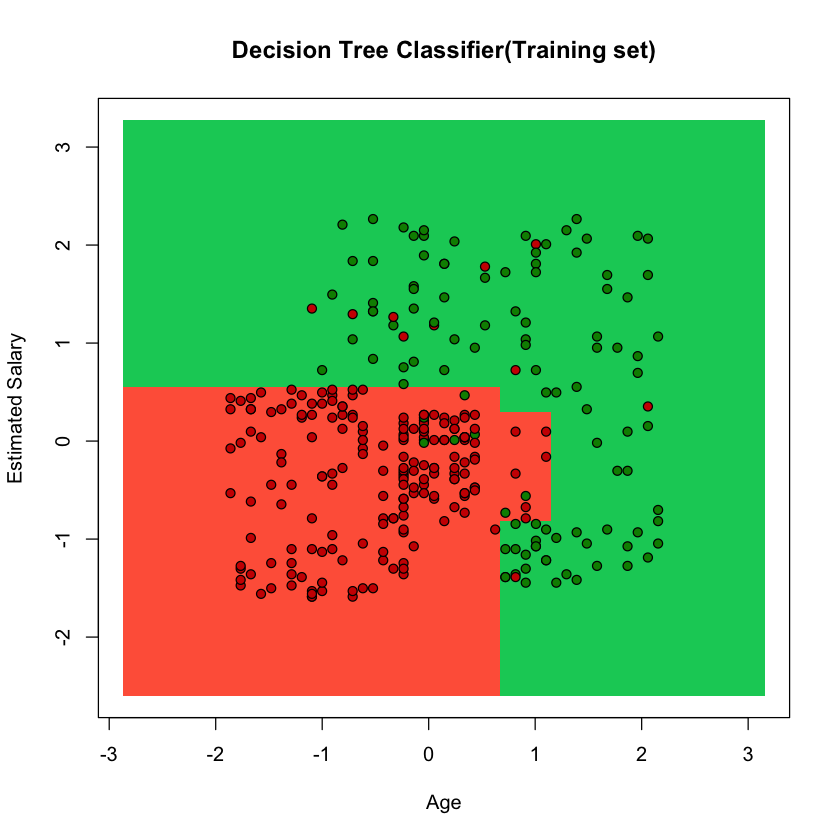

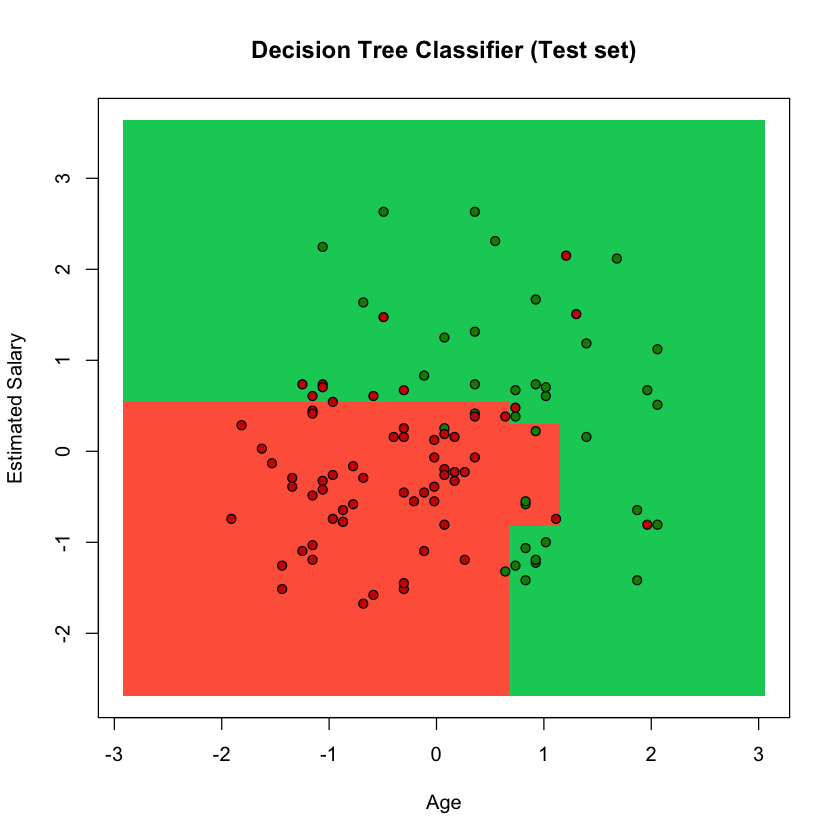

In [13]:

# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set,type = 'class')
plot(set[, -3],
     main = 'Decision Tree Classifier(Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3],
     main = 'Decision Tree Classifier (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))